In [25]:
import numpy

# number of data points
n_points = 25

# set a seed here to initialize the random number generator
# (such that we get the same dataset each time this cell is executed)
numpy.random.seed(1)

# let's generate some "non-linear" data
X = numpy.random.uniform(0,10, n_points)
X = numpy.sort(X)  # sort the data points to make it easier to visualize
y = numpy.sin(X) + numpy.random.random(n_points) * 1
X = X / 10

# reshape both arrays to make sure that we deal with N-dimensional Numpy arrays
y = y.reshape((len(y), 1))
X = X.reshape((len(X), 1))
print("Shape of our data matrix: %s" % str(X.shape))
print("Shape of our target vector: %s" % str(y.shape))

Shape of our data matrix: (25, 1)
Shape of our target vector: (25, 1)


In [26]:
import linreg

# instantiate the regression model
model = linreg.LinearRegression()

# fit the model
model.fit(X,y)

# get predictions for the data points
preds = model.predict(X)

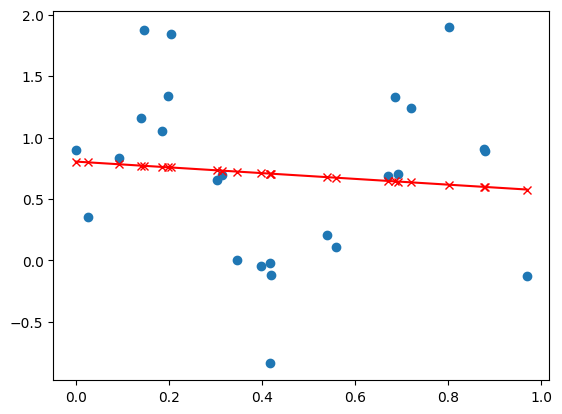

In [27]:
import matplotlib.pyplot as plt

# plot the points and the linear regression model
plt.plot(X, y, 'o')
plt.plot(X, preds, 'x', color='red')
plt.plot(X, preds, color='red')
plt.show()

In [28]:
# maximum degree of polynomial
max_degree = 10

def augment(X, max_order):
    """ Augments a given data
    matrix by adding additional 
    columns.
    
    NOTE: In case max_order is very large, 
    numerical inaccuracies might occur ...
    """
    
    X_augmented = X
    
    for i in range(2, max_order+1):
        print("Augmented with order %i ..." % i)
        X_augmented = numpy.concatenate([X_augmented, X**i], axis=1)
        
    return X_augmented

Xnew = augment(X, max_degree)
print("Shape of augmented data matrix: %s" % str(Xnew.shape))

Augmented with order 2 ...
Augmented with order 3 ...
Augmented with order 4 ...
Augmented with order 5 ...
Augmented with order 6 ...
Augmented with order 7 ...
Augmented with order 8 ...
Augmented with order 9 ...
Augmented with order 10 ...
Shape of augmented data matrix: (25, 10)


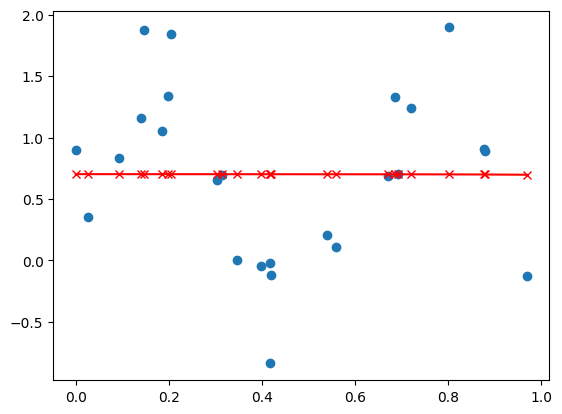

In [35]:
# fit linear regression model using the augmented data matrix
model = linreg.LinearRegression(lam=10, penalize_constant=False) # 
model.fit(Xnew, y)
preds = model.predict(Xnew)

# plot the results: only use the first column of the augmented
# data matrix, which corresponds to the original one-dimensional
# input variables
plt.plot(Xnew[:,0], y, 'o')
plt.plot(Xnew[:,0], preds, 'x', color='red')
plt.plot(Xnew[:,0], preds, color='red')

plt.show()

Augmented with order 2 ...
Augmented with order 3 ...
Augmented with order 4 ...
Augmented with order 5 ...
Augmented with order 6 ...
Augmented with order 7 ...
Augmented with order 8 ...
Augmented with order 9 ...
Augmented with order 10 ...


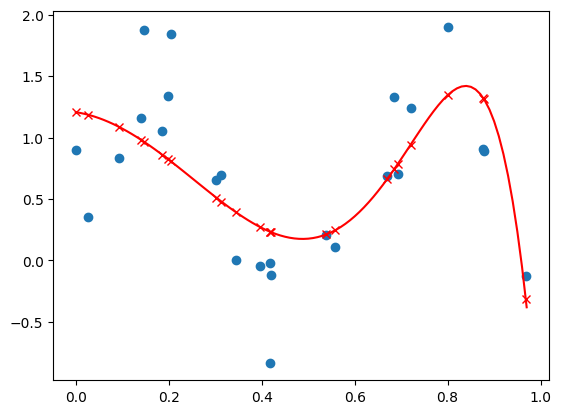

In [34]:
# same plot as before but with some more points
# for plotting the model ...
Xplot = numpy.arange(X.min(), X.max()+0.01, 0.01)
Xplot = Xplot.reshape((len(Xplot), 1))
Xplot = augment(Xplot, max_degree)
preds_plot = model.predict(Xplot)

plt.plot(Xnew[:,0], y, 'o')
plt.plot(Xnew[:,0], preds, 'x', color='red')
plt.plot(Xplot[:,0], preds_plot, '-', color='red')

plt.show()